# Part 1 - Dataset Exploration 

# Ford GoBike System Data

# Nick Mwaura

This document explores the dataset ford Gobike system that contains information about individual rides made in a bike sharing 
sharing system covering the San Francisco Bay area.

# Preliminary Wrangling

In [1]:
# Here we begin by importing all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Next we load the dataset and describe its properties.

In [2]:
# load in the dataset into a pd dataframe
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
print (df_bike.shape)

(183412, 16)


The file has 183412 entries and 16 columns 

In [4]:
print(df_bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
print(df_bike.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


This are the listed datatypes of the dataset.

In [6]:
df_bike.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


In [7]:
# Check null value for each column
df_bike.isna().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

The are missing values in start_station_id, start_station_name,end_station_id,end_station_name,member_birth_year,member_gender columns.

# Data Cleaning

The first issue with our dataset os that it contains missing values as shown above.

We need to drop the rows with missing values.

# 1) Remove the missing values

In [8]:
df_bike.dropna(inplace=True)

We need to check that all missing values are deleted

In [9]:
df_bike.isna().sum()


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

# 2) Convert the columns datatypes of time to datetime datatypes.

The next issue relates to the data types of the start_time and end_time columns which 
are in string (object).

We  need to convert the columns to datetime.

In [10]:
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

# 3) Convert the column bike_id from int64 type to object datatype

In [11]:
df_bike['bike_id'] =df_bike.bike_id.astype(str)

We need to confirm our changes

In [12]:
type(df_bike['bike_id'][0])

str

# 4)Convert the user_type datatype from object to category dtype

In [13]:
df_bike['user_type'] =df_bike.user_type.astype('category')

In [14]:
type(df_bike['user_type'][0])

str

In [15]:
# test
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

We have cleaned the quality issues realting to the data columns that we are in much need
of which are highlighted as below:
    
    . Removed all missing values from our dataset.
    . start_time and end_time columns have been changed to datetime dtype.
    . bike_id column to object dtype.
    . user_type column to categorical dtype.

# Data Exploring 

Extract the day, month and year columns from the start and end date.

In [16]:
import datetime as dt
df_bike['start_day'] = df_bike['start_time'].dt.day_name()
df_bike['start_month'] = df_bike['start_time'].dt.month_name()

# df_bike['start_year'] = df_bike['start_time'].dt.year
df_bike['start_hr'] = df_bike['start_time'].dt.hour
df_bike['start_hr'] = df_bike.start_hr.astype(str)




df_bike['end_day'] = df_bike['end_time'].dt.day_name()
df_bike['end_month'] = df_bike['end_time'].dt.month_name()
df_bike['end_hr'] = df_bike['end_time'].dt.hour
df_bike['end_hr'] = df_bike.end_hr.astype(str)

# bike['start_year'] = bike['start_time'].dt.year
df_bike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,February,17,Friday,March,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,February,12,Friday,March,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Thursday,February,17,Friday,March,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Thursday,February,23,Friday,March,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,Thursday,February,23,Friday,March,0


In [17]:
# We need to describe statistics for the variable (duration_sec)
df_bike.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [18]:
df_bike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,February,17,Friday,March,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,February,12,Friday,March,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Thursday,February,17,Friday,March,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Thursday,February,23,Friday,March,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,Thursday,February,23,Friday,March,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,Subscriber,1996.0,Male,No,Friday,February,0,Friday,February,0
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,Subscriber,1984.0,Male,No,Friday,February,0,Friday,February,0
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,Subscriber,1990.0,Male,Yes,Friday,February,0,Friday,February,0
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,Subscriber,1988.0,Male,No,Friday,February,0,Friday,February,0


# What is the structure of your dataset?

The df_bike dataset consists of 174952 rows x 22 columns.In other words, this dataset has 
174952 observations and 22 variables.

# What are the main features of interest in your dataset?

The main features of interest in this dataset is finding out the time of the day, 
day of the week, month of the year that most trips were taken and these relates to the
duration_sec, start_time, and user_type column.

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The start_date variable will provide the information that is needed for this findings
because we will be able to extract the day, week, and month columns.We expect the variable to help in further
analysis of our expectation that most of the trips take place in the morning hour, weekdays and holiday months.

# Exploratory Data Analysis

In [19]:
df_bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_day', 'start_month', 'start_hr', 'end_day', 'end_month',
       'end_hr'],
      dtype='object')

In [20]:
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,2001.000000


In [21]:
df_bike.groupby('user_type').describe()

duration_sec                                                        \
                  count         mean          std   min    25%    50%     75%   
user_type                                                                       
Customer        16566.0  1310.656103  3399.899962  62.0  498.0  780.0  1230.0   
Subscriber     158386.0   640.551305  1314.319131  61.0  312.0  490.0   750.0   

                    start_station_id              ... end_station_longitude  \
                max            count        mean  ...                   75%   
user_type                                         ...                         
Customer    83519.0          16566.0  135.650549  ...           -122.391034   
Subscriber  84548.0         158386.0  139.352676  ...           -122.279720   

                       member_birth_year                                  \
                   max             count         mean        std     min   
user_type                                                                  
Customer   -121.876613           16566.0  1985.351382   9.486138  1878.0   
Subscriber -121.874119          158386.0  1984.745792  10.180949  1900.0   

                                            
               25%     50%     75%     max  
user_type                                   
Customer    1981.0  1987.0  1992.0  2001.0  
Subscriber  1980.0  1987.0  1992.0  2001.0  

[2 rows x 64 columns]

# Univariate Exploration

In this section, investigate distributions of individual variables.If you see unusual
points or outliers, take a deeper look to clean things up and prepare yourself to look
at the relationships between the variables.

# The number of Bicycle service users

In [22]:
# There are only two types of users in the dataset

df_bike.user_type.unique()

['Customer', 'Subscriber']
Categories (2, object): ['Customer', 'Subscriber']

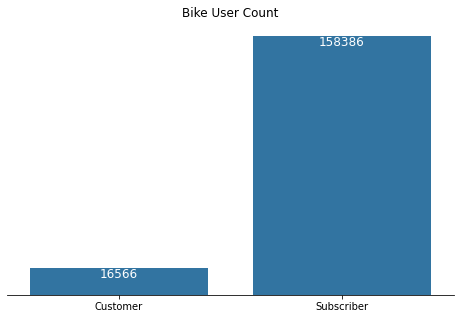

In [23]:
# We now show the number of user using countplot

plt.figure(figsize=(8,5))     
base_color = sb.color_palette()[0]
ax = sb.countplot(data=df_bike, x ='user_type', color=base_color)

# add annotations
n_points = df_bike.shape[0]
cat_counts = df_bike['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'w', fontsize=12)

plt.title('Bike User Count')

# Remove unnecessary features 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Show the plot
plt.show();

The number of users who are subscibers are many in number compared to the users who are customers,
from the above plot.

# The Bike User Count Comparison by Percentage of the Total

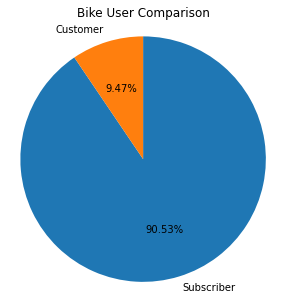

In [24]:
# We plot the user type by it's percentage.

plt.figure(figsize=(8,5))
sorted_counts = df_bike['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Comparison', fontsize=12);

From the total number of customers, 90.53% of the users are Subscribers while 9.47%
of the users are Customers.

# What is the average trip duration?

In [25]:
# The trip duration average

df_bike.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

The trip duration average is 704.002744 seconds or approximately 11 minutes.

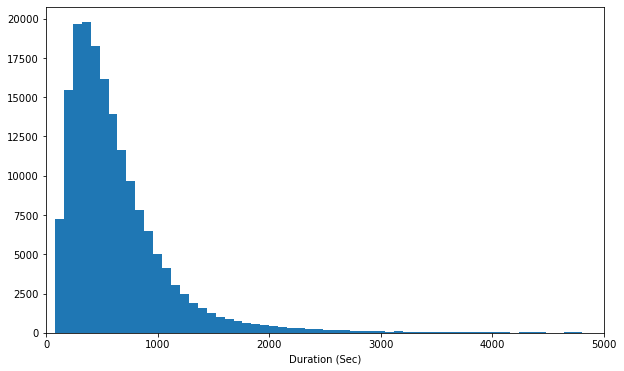

In [26]:
binsize = 80
bins = np.arange(80, df_bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_bike, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.xlim([0, 5000]);

Next we plot the tail part of the distribution

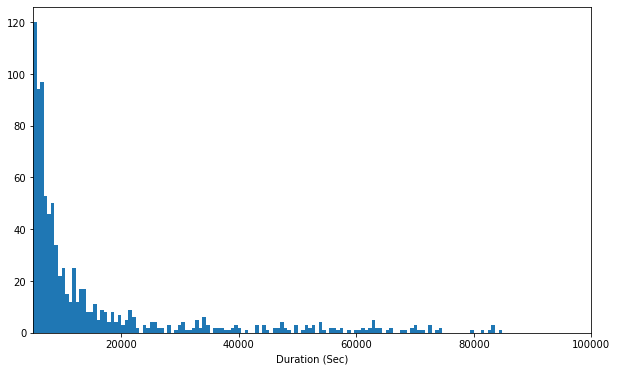

In [27]:
# Tail part of the duration distribution of the average trips.

binsize = 600
bins = np.arange(5000, df_bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data =df_bike, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.xlim([5000, 100000]);


There is a long tail in the distribution of the trip duration, so we need to use the
log scale instead in order to attain a plot that show the trip duration.

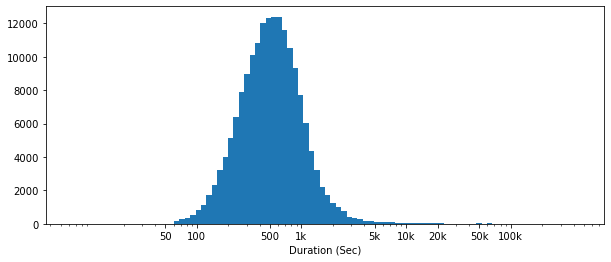

In [28]:
log_binsize = 0.045
bins = 14 ** np.arange(0.7, np.log10(df_bike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 4])
plt.hist(data = df_bike, x = 'duration_sec', bins=bins)
plt.xscale('log')
# plt.xlim([0,2500])
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration (Sec)');

Duration has a long-tailed distribution, which does have a high number of trips
at the end of between range (250 - 1000 seconds) and a number of few long duration at 
the end.It has a high frequency at 500 secs and a downward frquency till around 10k secs.
There are fewer durations later but with spaces in between them.

# How many trips in a week?

<AxesSubplot:xlabel='end_day', ylabel='count'>

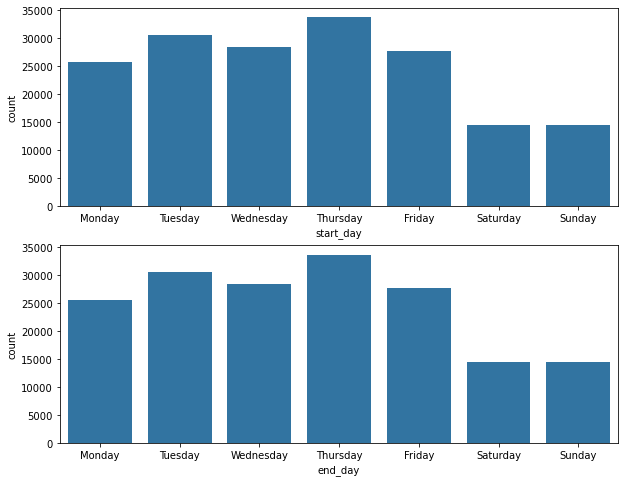

In [29]:

day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]


fig, ax = plt.subplots(2, figsize = [10,8])
default_color = sb.color_palette()[0]
sb.countplot(data = df_bike, x = 'start_day',order=day_name, color = default_color,  ax = ax[0])
sb.countplot(data = df_bike, x = 'end_day',order=day_name, color = default_color,  ax = ax[1])

This is the representation of the start_day of the days in a week in reference to the data.
Now we need to plot the end_day of the data.

The service is mostly used on weekdays than on weekends.Most of the trips are taken on start and end days on Thursdays, then tuesday,friday,
wednesday and later Monday respectively.

The frequency is low on weekends, i.e Saturdays and Sundays.

# Ride freqency based on hour

In [30]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)],
                   'start_month' : ['February','March'],
                   'end_month' : ['February', 'March']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_bike[var] = df_bike[var].astype(ordered_var)

<AxesSubplot:xlabel='end_hr', ylabel='count'>

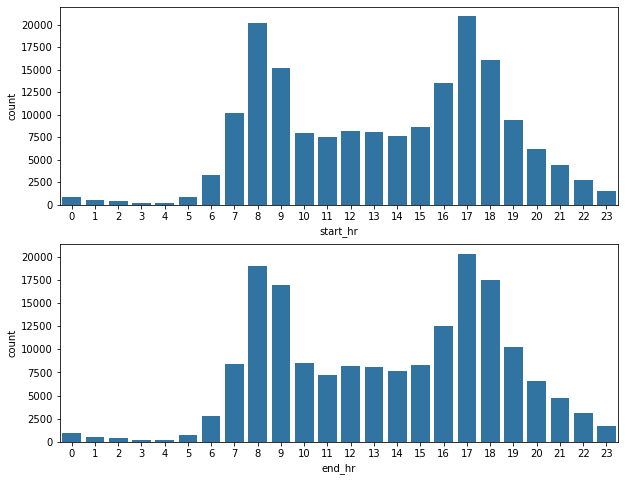

In [31]:
fig, ax = plt.subplots(2,figsize = [10,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df_bike, x = 'start_hr', color = default_color,  ax = ax[0])
sb.countplot(data = df_bike, x = 'end_hr', color = default_color, ax = ax[1])

From the above we observe that for the days, the  8,9,17 and 18 (th) hours are the 
one that have the highest trip records.This is expected as people are always rushing to work
in the morning hours and also in the evening as they leave.


The hours with the lowest trip records are the 3rd and 4th.

# Bike ride Usage based on month

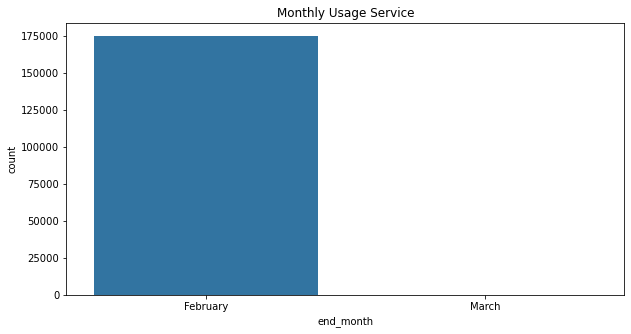

In [32]:

plt.figure(figsize=(10,5))
plt.title('Monthly Usage Service')
sb.countplot(data=df_bike, x='end_month', color=base_color);

The bike usage frequency is high in the month of February.Which shows that all trips began in
the month of February.

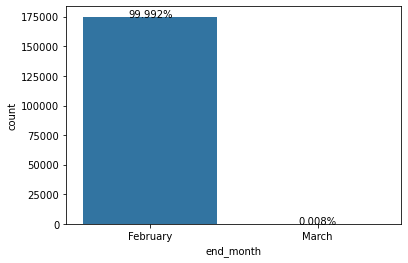

In [33]:
# We now need to ascertain the percentage and count of users in this plot.

ax = sb.countplot(data = df_bike, x = 'end_month',  color=sb.color_palette()[0], order=df_bike.end_month.value_counts().index)

total = len(df_bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

We now are able to ascertain that in the month of February a 99.992% of users 
accessed the bike services compared to the month of March where only 0.008% of the 
users accessed which is a lower number.

# Ride Frequency of Users per gender

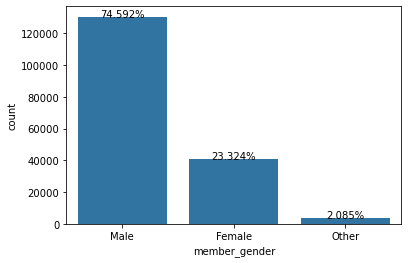

In [34]:
ax = sb.countplot(data = df_bike, x = 'member_gender',  color=sb.color_palette()[0], order=df_bike.member_gender.value_counts().index)

total = len(df_bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

We can ascertain that the most dominant gender of bike users is male who have a 
74.592% compared to female who have a 23.324% while as others have a 2.085%.

There are more subscribers (> 90%), compared to the normal customers.
Most of the cyclers are male (> 70%).


# Bivariate Exploration

In this section, investigate relationships between pairs of variables in your data.
Make sure the variables that you cover here have been introduced in some fashion in
the previous section (univariate exploration).

# Riding  Duration of Users per type

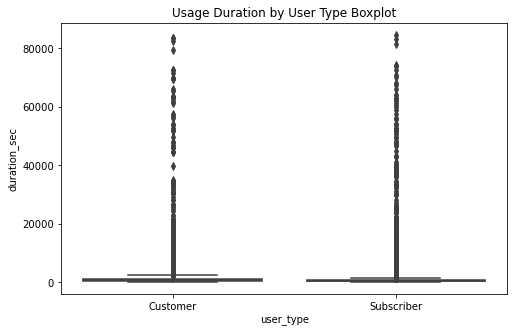

In [35]:
plt.figure(figsize=(8,5))
plt.title('Usage Duration by User Type Boxplot')
sb.boxplot(data=df_bike, x='user_type', y='duration_sec');

From the plot it appears that customers tend to spend a lot of time on average compared to the subscribers.

In [36]:
## Average trip duration for subscribers.

customer0 = df_bike['user_type']=='Customer'
subscriber0 = df_bike['user_type']=='Subscriber'


In [37]:
df_bike[customer0].duration_sec.mean()

1310.656102861282

The average duration of customers is 1310.65 seconds which is 21 minutes.

In [38]:
df_bike[subscriber0].duration_sec.mean()

640.5513050395869

The avarage duration of subscribers is 640.55 seconds which is approximately 10 minutes

In relation to the plot per user, we can confirm that the average duration of customers is higher compared to subscribers.

# Riding Average per User In Relation to Bike Usage per month

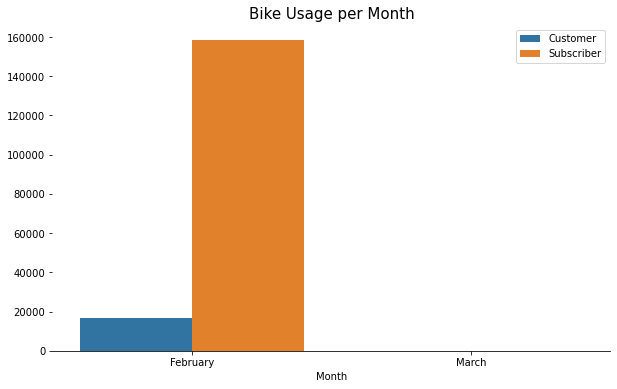

In [45]:
plt.figure(figsize=(10,6))


plt.title('Bike Usage per Month', fontsize=15)
chart = sb.countplot(data=df_bike, x='end_month',hue='user_type')


chart.set(xlabel='Month', ylabel='')

# Remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');


In the month of February we have both users frequency being higher compared to the month of March but in relation to the bike usage per
month ,subscribers have the highest frequency.

# Bike  Usage of Each User per Day

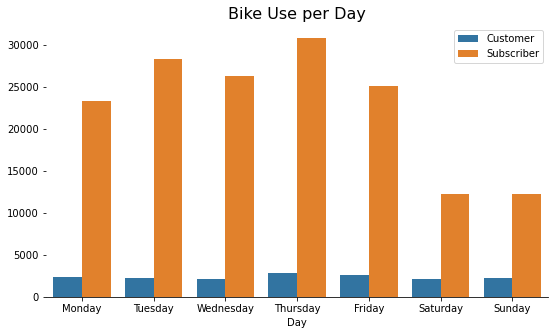

In [46]:
plt.figure(figsize=(9,5))
plt.title('Bike Use per Day', fontsize=16)
chart = sb.countplot(data=df_bike, x='start_day', order=day_name, hue='user_type')
chart.set(xlabel='Day', ylabel='')


sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('')

The user of the bikes seems to be lower for the customers compared to the subscribers.
Subscribers seem to have a higher frequency of usage on weekdays which reduces on weekends.


# Multivariate Exploration

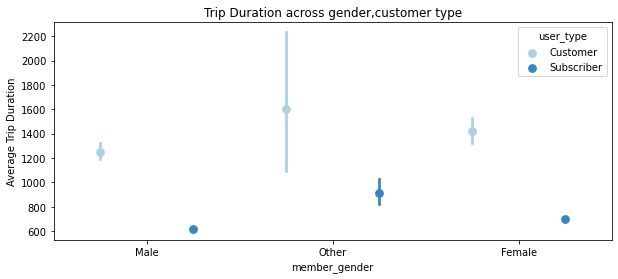

In [47]:
fig = plt.figure(figsize = [10,4])
ax = sb.pointplot(data = df_bike, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.5)
plt.title('Trip Duration across gender,customer type')
plt.ylabel('Average Trip Duration')


ax.set_yticklabels([],minor = True)
plt.show();

The user of  gender other with reference to both user type customer 
and subscriber have spent most duration compared to the females and males. 

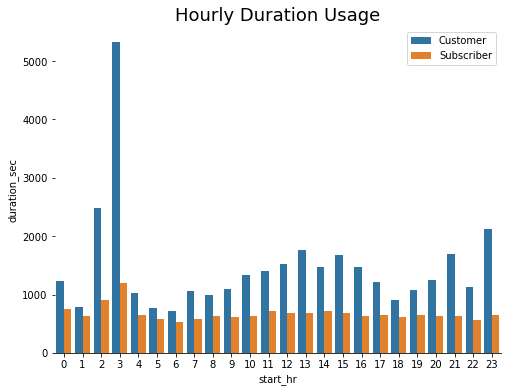

In [48]:
plt.figure(figsize=(8,6))
plt.title('Hourly Duration Usage', fontsize=18)
sb.barplot(data=df_bike, x='start_hr', y='duration_sec', ci=None, hue='user_type')

chart.set(xlabel='Hour', ylabel='')

# Remove the  legend 
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

The customers used a higher frequency of hourly average duration compared to
the subscribers.

# Conclusion of  Analysis

The user type does have an influence on the use of the service.
It is based upon the following:
    


1) Hours of use

The Subscribers have a higher usage rate at the peak hours, while the 
customers have a much more flexible time rate.

2) Days of Use

The days of use of subscribers are mostly in the weekdays and less on weekends,
while the customers seem to have a much flexible time.

3) Duration of Use

The duration of use for subscribers tends to have a more consistent duration
than the customers.

The average duration for all trips is < 500 seconds.Most number of the trips were done
on the days of Tuesday and Thursday.The highest number of trips were taken by males (> 70%).


Customers spent more duration than the subscribers.The highest number of trips that
were taken are done by subscribers which is > 90%.



In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Ford GoBike System Data Part 1.ipynb'])

1